In [10]:
from statevectorsim import QuantumState, QuantumCircuit, QuantumGate
from statevectorsim.utils import *

## Monte Carlo Simulation of the Bell State
$$
\psi = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

### Single Iteration

   Index State       Amplitude
0      0  |00>  0.7071+0.0000j
1      1  |01>  0.0000+0.0000j
2      2  |10>  0.0000+0.0000j
3      3  |11>  0.7071+0.0000j
Output:  [1, 1] 



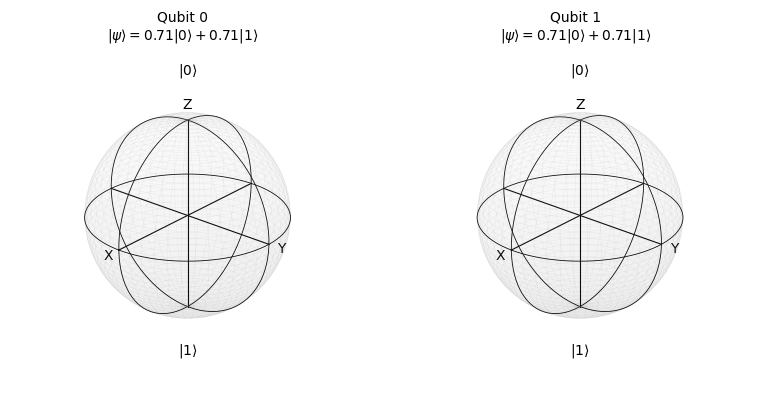

In [11]:
# 2-qubit Bell state
qr = QuantumState(2)
bell = QuantumCircuit.bell()
bell.run(qr)
out = qr.statevector()

print(statevector_to_dataframe(out))
print('Output: ', qr.measure_all(),'\n')
plot_bloch_spheres(out)

### 10000 Iterations
Run Bell Circuit 10000 times and check results are 50% $|00\rangle$ and 50% $|11\rangle$ up to a 3% statistical fluctuation.

In [12]:
# Parameters
n_qubits = 2
shots = 10000
tolerance = 0.03

# Initialise
initial_state = QuantumState(n_qubits)
bell_circuit = QuantumCircuit.bell()

# Simulate
print(f"Simulating {shots} shots...")
results = bell_circuit.measure_all(initial_state, shots=shots)

# Expected outcomes for Bell state |Φ+⟩ are '00' and '11'
expected_keys = {'00', '11'}
total_count = sum(results.values())
print("\n--- Results ---")
print(f"Total Shots: {total_count}")
print("Measurement Counts:", results)

# Check only '00' & '11'  are observed
unexpected_keys = set(results.keys()) - expected_keys
if unexpected_keys:
    print(f"FAIL: Unexpected outcomes observed: {unexpected_keys}")
    test_passed = False
else:
    print("PASS: Only expected states ('00', '11') observed.")
    test_passed = True

# Check probabilities are close to 50%
expected_prob = 0.5
prob_00 = results.get('00', 0) / shots
prob_11 = results.get('11', 0) / shots

print(f"\nObserved P('00'): {prob_00:.4f} (Expected: {expected_prob:.4f})")
print(f"Observed P('11'): {prob_11:.4f} (Expected: {expected_prob:.4f})")

is_00_close = abs(prob_00 - expected_prob) <= tolerance
is_11_close = abs(prob_11 - expected_prob) <= tolerance

if is_00_close and is_11_close:
    print(f"PASS: Probabilities are within {tolerance * 100}% tolerance.")
else:
    print("FAIL: Probabilities deviate significantly from 50/50.")
    test_passed = False

# Summary
print("\n---------------------------------------------------------")
if test_passed:
    print("--- BELL STATE SIMULATION TEST: SUCCESSFUL ---")
else:
    print("--- BELL STATE SIMULATION TEST: FAILED ---")
print("---------------------------------------------------------")

Simulating 10000 shots...

--- Results ---
Total Shots: 10000
Measurement Counts: {'00': 5025, '11': 4975}
PASS: Only expected states ('00', '11') observed.

Observed P('00'): 0.5025 (Expected: 0.5000)
Observed P('11'): 0.4975 (Expected: 0.5000)
PASS: Probabilities are within 3.0% tolerance.

---------------------------------------------------------
--- BELL STATE SIMULATION TEST: SUCCESSFUL ---
---------------------------------------------------------


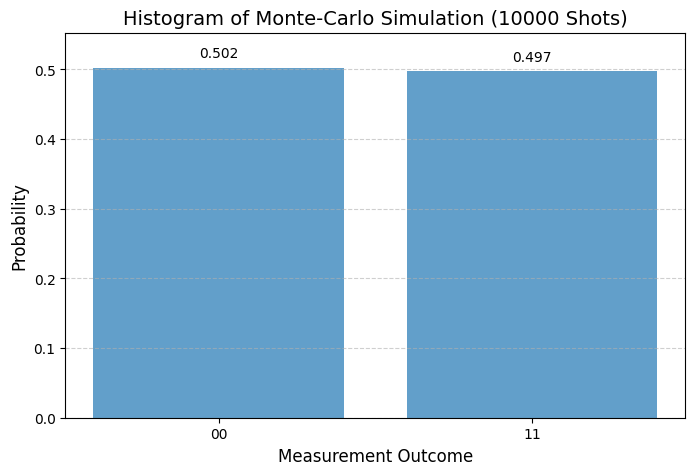

In [13]:
plot_histogram(results, shots)

## GHZ Monte-Carlo (3-Qubit)
A more general version of Bell state.
$$
\psi = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)
$$
## Single Iteration

   Index  State       Amplitude
0      0  |000>  0.7071+0.0000j
1      1  |001>  0.0000+0.0000j
2      2  |010>  0.0000+0.0000j
3      3  |011>  0.0000+0.0000j
4      4  |100>  0.0000+0.0000j
5      5  |101>  0.0000+0.0000j
6      6  |110>  0.0000+0.0000j
7      7  |111>  0.7071+0.0000j
Output:  [0, 0, 0] 



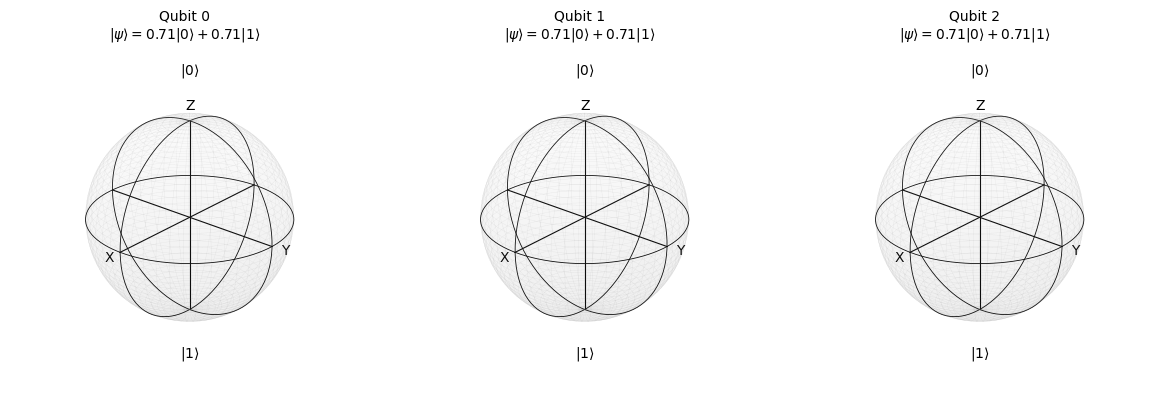

In [14]:
# 3-qubit GHZ state
qr = QuantumState(3)
ghz = QuantumCircuit.ghz(3)
ghz.run(qr)
out = qr.statevector()

print(statevector_to_dataframe(out))
print('Output: ', qr.measure_all(),'\n')
plot_bloch_spheres(out)

## 10000 Iterations

In [15]:
# Setup
n_qubits = 3
shots = 10000
initial_state = QuantumState(n_qubits)
ghz_circuit = QuantumCircuit.ghz(n_qubits)

# Simulation
print(f"Simulating {shots} shots...")
results = ghz_circuit.measure_all(initial_state, shots=shots)

# Results
expected_keys = {'000', '111'}
total_count = sum(results.values())
test_passed = True

print("\n--- Results Analysis ---")
print(f"Total Shots: {total_count}")
print("Measurement Counts:", results)

# Check only '000' and '111' observed
unexpected_keys = set(results.keys()) - expected_keys
if unexpected_keys:
    print(f"FAIL: Unexpected outcomes observed: {unexpected_keys}")
    test_passed = False
else:
    print("PASS: Only expected states ('000', '111') observed.")

# Check probabilities are close to 50%
expected_prob = 0.5
prob_000 = results.get('000', 0) / shots
prob_111 = results.get('111', 0) / shots

print(f"\nObserved P('000'): {prob_000:.4f} (Expected: {expected_prob:.4f})")
print(f"Observed P('111'): {prob_111:.4f} (Expected: {expected_prob:.4f})")

is_000_close = abs(prob_000 - expected_prob) <= tolerance
is_111_close = abs(prob_111 - expected_prob) <= tolerance

if is_000_close and is_111_close:
    print(f"PASS: Probabilities are within {tolerance*100}% tolerance.")
else:
    print("FAIL: Probabilities deviate significantly from 50/50.")
    test_passed = False


# Summary
print("\n---------------------------------------------------------")
if test_passed:
    print("--- GHZ STATE SIMULATION TEST: SUCCESSFUL ---")
else:
    print("--- GHZ STATE SIMULATION TEST: FAILED ---")
print("---------------------------------------------------------")

Simulating 10000 shots...

--- Results Analysis ---
Total Shots: 10000
Measurement Counts: {'111': 4925, '000': 5075}
PASS: Only expected states ('000', '111') observed.

Observed P('000'): 0.5075 (Expected: 0.5000)
Observed P('111'): 0.4925 (Expected: 0.5000)
PASS: Probabilities are within 3.0% tolerance.

---------------------------------------------------------
--- GHZ STATE SIMULATION TEST: SUCCESSFUL ---
---------------------------------------------------------


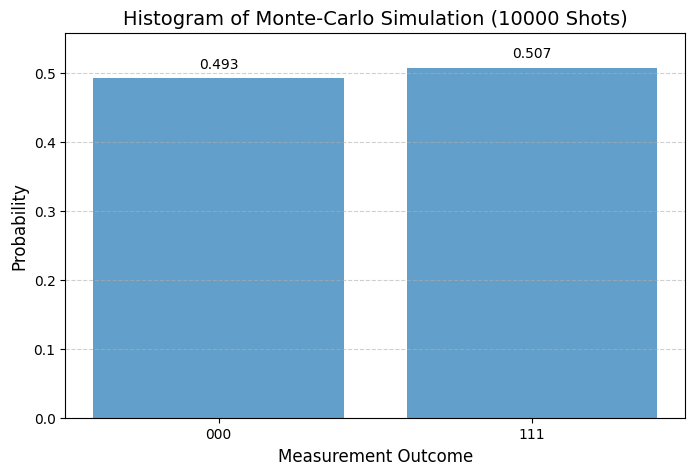

In [6]:
plot_histogram(results, shots)